In [3]:
#import cv2
import numpy as np
from matplotlib import pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Обработка изображений
<p>Курс "Модели и методы интеллектуального анализа данных"</p>
<p>Чернышов Юрий Юрьевич</p>
<p>доцент кафедры "ИТиЗИ" УрГУПС (Екатеринбург)</p>
<p>yuchernyshov@usurt.ru</p>

# Оглавление <a name='toc'></a>
<ol>
    <li><a href='#intro'>Введение</a></li>
    <li><a href='#graphics'>Элементы компьютерной графики</a>
        <ol>
        <li><a href='#pics'>Форматы изображений</a></li>
        <li><a href='#pixel'>Пиксель</a></li>
        <li><a href='#voxel'>Воксель</a></li>
        </ol>
    </li>
    <li><a href='#env'>Подготовка окружения для работы с изображениями</a></li>
    <li><a href='#basic'>Основные методы работы с изображениями</a></li>
    <li><a href='#apps'>Прикладные задачи</a>
        <ol>
        <li><a href='#points'>Распознавание точек</a></li>
        <li><a href='#digits'>Распознавание цифр</a></li>
        <li><a href='#formulas'>Определение картинок с математическими формулами</a></li>
        <li><a href='#dicom'>Работа с медицинскими изображениями DICOM</a></li>
        </ol>
    </li>
    <li><a href='#links'>Ссылки</a>
    <li><a href='#hometask'>Задание для самостоятельной работы</a>
</ol>

# Введение <a name='intro'></a>

При работе с изображениями часто возникают одни из самых сложных задач машинного обучения. Практических задач работы с изображениями очень много - задачи распознавания символов, определение аномалий на рисунке или видео, идентификация и многое другое.

Сложность задач, возникающих при работе с изображениями, связана с необходимостью применения более сложного математического аппарата, большим числом признаков при машинном обучении, более сложной предварительной обработкой имеющихся исходных данных. Выделить в имеющемся исходном графическом материале качественные и эффективные признаки для машинного обучения является большим искусством.

Существует множество библиотек с реализованными функциями работы с изображениями, при этом самой популярной является библиотека с открытым исходным кодом OpenCV.

<a href='#toc'>Назад к Оглавлению</a>

# Элементы компьютерной графики 
<a name='graphics'></a>

Компьютерная (машинная) графика это применение вычислительных технологий и устройств для оцифровки, обработки, хранения, использования графической и видео информации. Необходимость обработки и передачи графики (особенно видео), в том числе, является стимулом в развитии вычислительных мощностей устройств (компьютеров, смартфонов, серверов, видеокарт), устройств хранения информации а также сетей передачи данных.

Рассмотрим наиболее популярные на сегодняшний момент форматы графических и видеофайлов.

Графические файлы предназначены для хранения изображений, таких как фотографии, рисунки, а также изображений специального назначения (например, медицинские, технические). Графические форматы делятся на векторные и растровые. Для оптимизации размера графического файла могут применяться специальные алгоритмы сжатия графической информации, большинство графических форматов поддерживают такое сжатие.

Наиболее популярными форматами графический файлов являются .bmp, .jpg, .gif, .png.

BMP (англ. Bitmap Picture) - формат хранения растровых изображений, разработанный компанией Microsoft.

В данном формате можно хранить только однослойные растры. На каждый пиксель в разных файлах может приходиться разное количество бит (глубина цвета). Microsoft предлагает битности 1, 2, 4, 8, 16, 24, 32, 48 и 64. В битностях 8 и ниже цвет указывается индексом из таблицы цветов (палитры), а при бо́льших — непосредственным значением. Цвет же в любом случае можно задать только в цветовой модели RGB (как при непосредственном указании в пикселе, так и в таблице цветов), но в битностях 16 и 32 можно получить Grayscale с глубиной до 16 и 32 бит, соответственно. Частичная прозрачность реализована альфа-каналом различных битностей, но при этом прозрачность без градаций можно косвенно получить RLE-кодированием.

JPEG (англ. Joint Photographic Experts Group, по названию организации-разработчика) - один из популярных растровых графических форматов, применяемый для хранения фотографий и подобных им изображений.
Алгоритм JPEG позволяет сжимать изображение как с потерями, так и без потерь (режим сжатия lossless JPEG). 
Поддерживаются изображения с линейным размером не более 65535 × 65535 пикселов.

GIF (англ. Graphics Interchange Format) - растровый формат графических изображений. Способен хранить сжатые данные без потери качества в формате не более 256 цветов. Формат GIF был разработан в 1987 году для передачи растровых изображений по сетям. В формате GIF есть поддержка прозрачности и анимации. GIF эффективно сжимает файлы, в которых много однородных заливок (логотипы, надписи, схемы). Долгое время GIF был одним из наиболее распространённых форматов в интернете.

PNG (англ. Portable Newtork Graphics) был спроектирован для замены устаревшего и более простого формата GIF, а также для замены значительно более сложного формата TIFF. Формат PNG позиционируется прежде всего для использования в Интернете и редактирования графики.

Пиксель (англ. pixel — сокращение от слов piсtures element) — наименьший логический двумерный элемент цифрового изображения в растровой графике, или физический элемент матрицы дисплеев, формирующих изображение. Пиксель представляет собой неделимый объект прямоугольной или круглой формы, характеризуемый определённым цветом. Растровое компьютерное изображение состоит из пикселей, расположенных по строкам и столбцам.

Чем больше пикселей на единицу площади содержит изображение, тем более оно детально. Максимальная детализация растрового изображения задаётся при его создании и не может быть увеличена. Если увеличивается масштаб изображения, пиксели превращаются в крупные "зёрна".

Воксел (англ. Voxel — сокращение от слов: объёмный (англ. volumetric) и пиксель (англ. pixel)) — элемент объёмного изображения, содержащий значение элемента растра в трёхмерном пространстве. Вокселы являются аналогами двумерных пикселей для трёхмерного пространства. Воксельные модели часто используются для визуализации и анализа медицинской и научной информации, при разработке компьютерных игр.

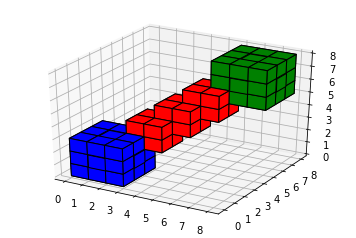

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


# prepare some coordinates
x, y, z = np.indices((8, 8, 8))

# draw cuboids in the top left and bottom right corners, and a link between them
cube1 = (x < 3) & (y < 3) & (z < 3)
cube2 = (x >= 5) & (y >= 5) & (z >= 5)
link = abs(x - y) + abs(y - z) + abs(z - x) <= 2

# combine the objects into a single boolean array
voxels = cube1 | cube2 | link

# set the colors of each object
colors = np.empty(voxels.shape, dtype=object)
colors[link] = 'red'
colors[cube1] = 'blue'
colors[cube2] = 'green'

# and plot everything
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(voxels, facecolors=colors, edgecolor='k')

plt.show()

<a href='#toc'>Назад к Оглавлению</a>

# Подготовка окружения <a name='env'></a>

Библиотеки python для работы с изображениями:

Наиболее популярной является OpenCV. Важно, что библиотека opencv не работает с версиями Python 3.6 и старше.

Для медицинских изображений (DICOM) - pydicom, ITK.

Библиотеки для работы с изображениями можно установить с помощью системы управления пакетами pip.
Например, установка OpenCV библиотеки выполняется командой

$\text{pip install opencv}$

Установка pydicom библиотеки выполняется командой

$\text{pip install pydicom}$


Также, если на рабочей машине установлена система Anaconda, можно для установки пакетов воспользоваться установщиком conda:

$\text{conda --name py35 opencv}$


Установленная библиотека OpenCV импортируется в программу python командой

$\text{import cv2}$

Мы испортировали библиотеку в самом начале лекции, проверим версию используемой библиотеки OpenCV.

In [3]:
print(cv2.__version__)

3.1.0


<a href='#toc'>Назад к Оглавлению</a>

# Основные методы работы с изображениями <a name='basic'></a>

## Преобразования, фильтры

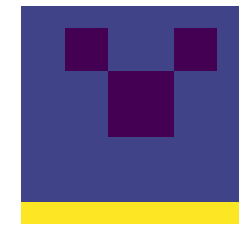

In [24]:
img = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 0, 0, 1, 1, 1, 0, 0, 1],
                  [1, 1, 0, 0, 1, 1, 1, 0, 0, 1],
                  [1, 1, 1, 1, 0, 0, 0, 1, 1, 1],
                  [1, 1, 1, 1, 0, 0, 0, 1, 1, 1],
                  [1, 1, 1, 1, 0, 0, 0, 1, 1, 1],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]]
              )

plt.imshow(img)
plt.axis('off')
plt.show()

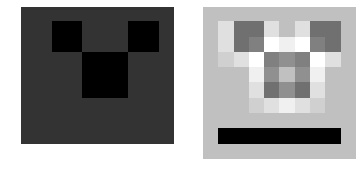

In [37]:
kernel = np.array([[-1, -1, -1],[-1, 8, -1],[-1,-1,-1]])
kernel1 = np.array([[0, -1, -1],[-1, 3, -1],[0,-1,0]])


img1 = [[0 for i in range(10)] for j in range(10)]
for i in range(1, len(img[0])-1):
    for j in range(1, len(img[0])-1):
        img1[i][j] = np.dot(
            img[i-1:i+2,j-1:j+2].flatten(), 
            kernel.flatten()
        )
        

fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray')
ax[0].axis('off')
ax[1].imshow(img1, cmap='gray')
ax[1].axis('off')
plt.show()

## Использование библиотеки OpenCV

Цветные изображения представляют собой матрицу троек чисел, соответствующие красному (R), зеленому (G) и синему (B) цвету в точке (RGB модель). Если каждую точку представить оттенком серого увета (число будет означать интенсивность), то можно существенно сократить объем исследуемого изображения. Например, загрузим цветное изображение, откроем его с использованием шкалы серого цвета и отобразим.

<img src='USURT.jpg'>

In [4]:
image_gray = cv2.imread("USURT.jpg", cv2.IMREAD_GRAYSCALE)

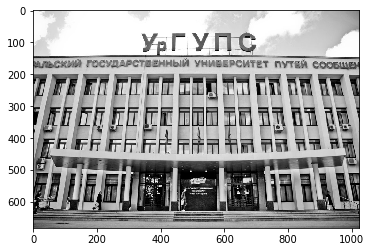

In [5]:
plt.imshow(image_gray, cmap="gray")
plt.show()

#### Работа с изображением как с массивом numpy

С объектом image_gray можно работать как с обычным массивом чисел, например, получить информацию о его размерах и значении конкретной точки.

In [6]:
type(image_gray)

numpy.ndarray

In [7]:
image_gray.shape, image_gray[0,0]

((683, 1024), 249)

In [8]:
image_gray.min(), image_gray.max()

(0, 255)

Также можно изменить размеры изображения используя механизмы индексов массива numpy.

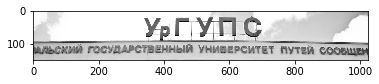

In [9]:
plt.imshow(image_gray[50:200,:], cmap="gray")
plt.show()

#### Цветовые схемы при работе с изображениями

При загрузке цветного изображения важно учитывать цветовую схему. Например, в OpenCV по умолчанию используется BGR схема, тогда как общеупотребительной является схема RGB (используется в matplotlib). В этом случае необходимо сделать дополнительное преобразование.

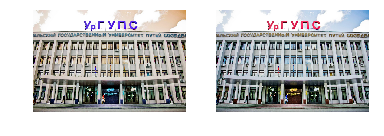

In [10]:
image_color_bgr = cv2.imread("USURT.jpg", cv2.IMREAD_COLOR)
image_color_rgb = cv2.cvtColor(image_color_bgr, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,2)
ax[0].imshow(image_color_bgr); ax[0].axis("off")
ax[1].imshow(image_color_rgb); ax[1].axis("off")
plt.show()

В матрице цветного изображения каждый элемент содержит три значения для синего (B), зеленого (G) и красного (R) цветов.

In [11]:
type (image_color_bgr), image_color_bgr[0, 0]

(numpy.ndarray, array([249, 249, 249], dtype=uint8))

#### Преобразование рисунка

Изменение размера.

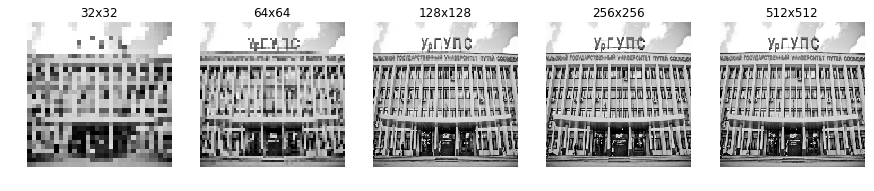

In [12]:
plt.rcParams['figure.figsize']=(15,5)
fig, ax = plt.subplots(1,5)
for i, size in enumerate([32, 64, 128, 256, 512]):
    ax[i].imshow(cv2.resize(image_gray, (size, size)), cmap="gray")
    ax[i].axis('off')
    ax[i].set_title("{}x{}".format(size, size))

Эффект размытости.

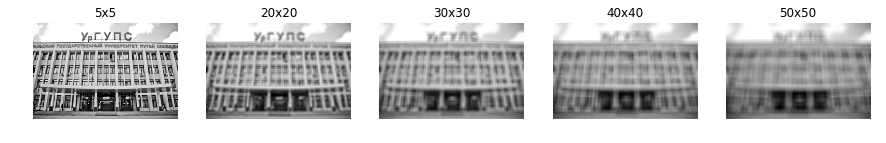

In [13]:
plt.rcParams['figure.figsize']=(15,15)
fig, ax = plt.subplots(1,5)
for i, size in enumerate([5, 20, 30, 40, 50]):
    ax[i].imshow(cv2.blur(image_gray, (size, size)), cmap="gray")
    ax[i].axis('off')
    ax[i].set_title("{}x{}".format(size, size))

Применение ядра

In [14]:
kernel = np.ones((5,5))/20
print(kernel)

[[0.05 0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05 0.05]]


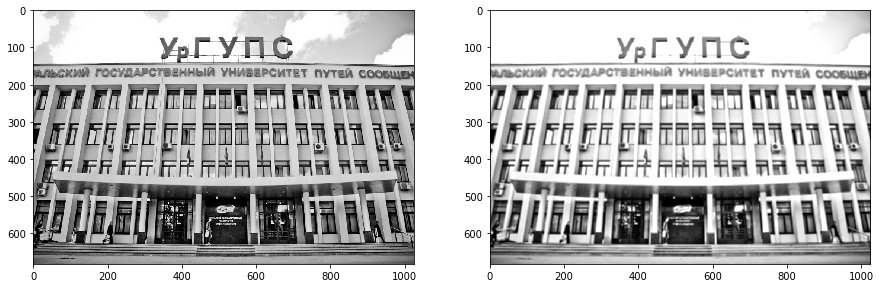

In [15]:
image_kernel = cv2.filter2D(image_gray, -1, kernel)
fig, ax = plt.subplots(1,2)
ax[0].imshow(image_gray, cmap='gray')
ax[1].imshow(image_kernel, cmap='gray')
plt.show()

Резкость изображений

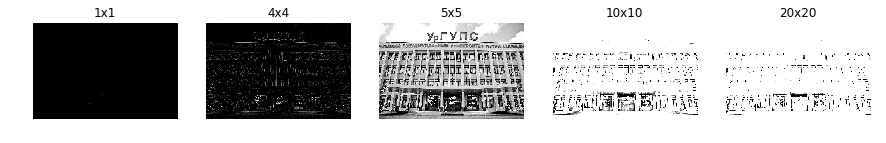

In [16]:
plt.rcParams['figure.figsize']=(15,15)
fig, ax = plt.subplots(1,5)
for i, size in enumerate([1, 4, 5, 10, 20]):
    kernel = np.array([[0,  -1,    0],
                       [-1, size, -1],
                       [0,  -1,    0]])
    ax[i].imshow(cv2.filter2D(image_gray, -1, kernel), cmap='gray')
    ax[i].axis('off')
    ax[i].set_title("{}x{}".format(size, size))

Построенное ядро выделяет центральный пиксель из всех, соседних с ним. При этом контрасты в изображении делаются более заметными.

Усиление контрастности

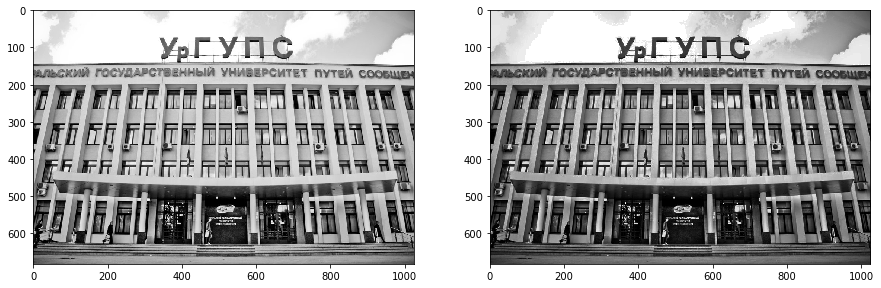

In [17]:
image_enchanced = cv2.equalizeHist(image_gray)
fig, ax = plt.subplots(1,2)
ax[0].imshow(image_gray, cmap='gray')
ax[1].imshow(image_enchanced, cmap='gray')
plt.show()

#### Выделение цвета

Преобразуем изображение в формат HSV (оттенок, насыщенность, значение цвета), определяем диапазон отображаемых значений, накладываем на изображение маску.

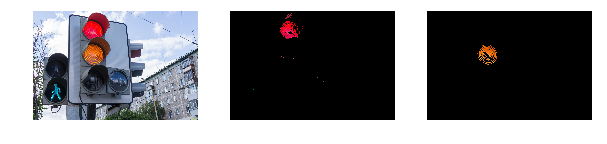

In [18]:
plt.rcParams['figure.figsize']=(10,7)
image_color_bgr = cv2.imread("traffic_light.jpg", cv2.IMREAD_COLOR)
image_color_rgb = cv2.cvtColor(image_color_bgr, cv2.COLOR_BGR2RGB)

image_hsv = cv2.cvtColor(image_color_bgr, cv2.COLOR_BGR2HSV)

lower_red = np.array([100,150,150])
upper_red = np.array([200,255,255])
mask = cv2.inRange(image_hsv, lower_red, upper_red)

image_masked_bgr = cv2.bitwise_and(image_color_bgr, image_color_bgr, mask=mask)
image_color_masked_rgb_red = cv2.cvtColor(image_masked_bgr, cv2.COLOR_BGR2RGB)

lower_yellow = np.array([10,150,150])
upper_yellow = np.array([75,255,255])
mask = cv2.inRange(image_hsv, lower_yellow, upper_yellow)

image_masked_bgr = cv2.bitwise_and(image_color_bgr, image_color_bgr, mask=mask)
image_color_masked_rgb_yellow = cv2.cvtColor(image_masked_bgr, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1,3)
ax[0].imshow(image_color_rgb); ax[0].axis("off")
ax[1].imshow(image_color_masked_rgb_red); ax[1].axis("off")
ax[2].imshow(image_color_masked_rgb_yellow); ax[2].axis("off")
plt.show()

#### Бинаризация изображений

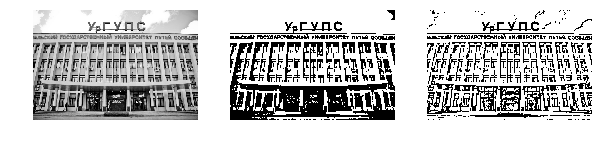

In [19]:
threshold = 160
image_binarized = np.array([0 if x<threshold else 255 for x in image_gray.ravel()]).reshape(image_gray.shape)
image_binarized_adaptive = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 55, 10)
fig, ax = plt.subplots(1,3)
ax[0].imshow(image_gray, cmap='gray'); ax[0].axis('off')
ax[1].imshow(image_binarized, cmap='gray'); ax[1].axis('off')
ax[2].imshow(image_binarized_adaptive, cmap='gray'); ax[2].axis('off')
plt.show()

<a href='#toc'>Назад к Оглавлению</a>

# Прикладные задачи <a name='apps'></a>

## Распознавание точек <a name='points'></a>

Создадим массив со случайной точкой. Задача модели - определить координаты этой точки.

In [20]:
def make_picture(size, r):
    a = np.zeros((size, size))
    x = np.random.randint(size)
    y = np.random.randint(size)
    for i in range(size):
        for j in range(size):
            if (x-i)**2 + (y-j)**2 < r**2:
                a[i,j]=1
    return a, x, y, x*size+y

In [21]:
n_samples = 25
size = 50
r = 5

pictures = []
x_target = []
y_target = []
pos_target = []

for i in range(n_samples):
    arr, x, y, pos = make_picture(size, r)
    pictures.append(arr)
    if i==0:
        data = np.array(arr).ravel()
    else:
        data = np.c_[data, np.array(arr).ravel()]
    x_target.append(x)
    y_target.append(y)
    pos_target.append(pos)

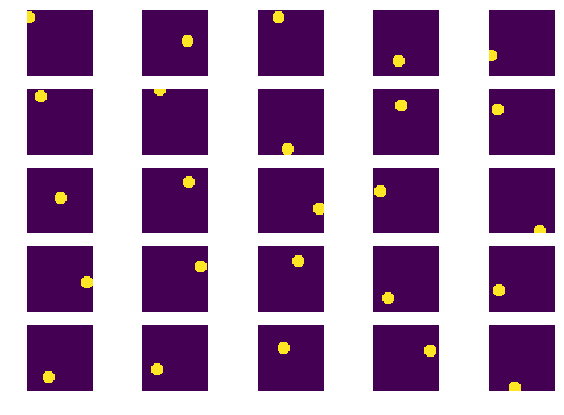

In [22]:
n = np.sqrt(n_samples).astype('int')
fig, ax = plt.subplots(n, n)
for pos in range(n_samples):
    ax[pos//n][pos%n].imshow(pictures[pos])
    ax[pos//n][pos%n].axis('off')
plt.show()

In [23]:
data.shape

(2500, 25)

In [24]:
data.T

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
clf = DecisionTreeClassifier()
clf.fit(data.T, pos_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

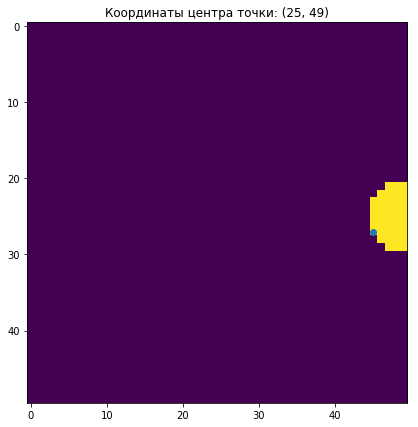

In [26]:
data_test, x_test, y_test, pos_check = make_picture(size, r)
plt.title("Координаты центра точки: ({}, {})".format(x_test, y_test))
plt.imshow(data_test)
pos = clf.predict(data_test.ravel().reshape(1,-1))
plt.scatter(pos%size, pos//size)
plt.show()

In [27]:
x_train = []
y_train = []
pos_train = []

for i in range(1000):
    arr, x, y, pos = make_picture(size, r)
    pictures.append(arr)
    if i==0:
        data_train = np.array(arr).ravel()
    else:
        data_train = np.c_[data_train, np.array(arr).ravel()]
    x_train.append(x)
    y_train.append(y)
    pos_train.append(pos)

clf.fit(data_train.T, pos_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

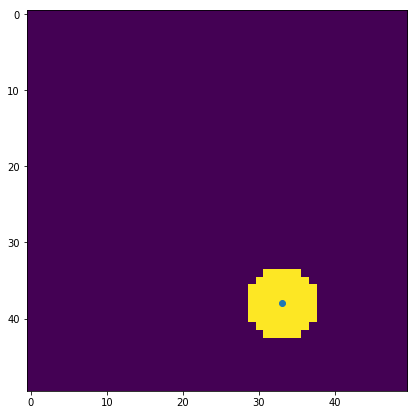

Правильные координаты центра точки: (38, 33), найденные моделью: ([38], [33])


In [28]:
data_test, x_test, y_test, _ = make_picture(size, r)
plt.imshow(data_test)
pos = clf.predict(data_test.ravel().reshape(1,-1))
plt.scatter(pos%size, pos//size)
plt.show()
print("Правильные координаты центра точки: ({}, {}), найденные моделью: ({}, {})".format(x_test, 
                                                                                           y_test, 
                                                                                           pos//size, 
                                                                                           pos%size))

## Распознавание цифр <a name='digits'></a>

In [29]:
from sklearn.datasets import load_digits

In [30]:
digits = load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [31]:
D = digits.images
y = digits.target
X = []
for i in range(len(D)):
    X.append(D[i].ravel())

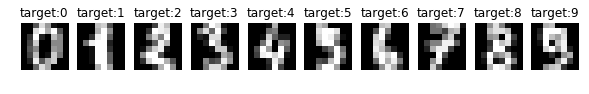

In [32]:
fig, ax = plt.subplots(1,10)
for i in range(10):   
    ax[i].imshow(D[i], cmap='gray')
    ax[i].axis('off')
    ax[i].set_title("target:{}".format(y[i]))
plt.show()

In [33]:
X[0].shape, D[0].shape

((64,), (8, 8))

In [34]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
clf = DecisionTreeClassifier()
clf.fit(Xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
clf.score(Xtest, ytest)

0.8222222222222222

In [36]:
clf.predict(X[1000].reshape(1, -1))

array([1])

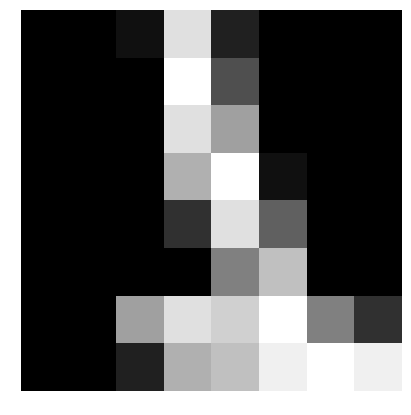

In [37]:
plt.imshow(X[1000].reshape(8,8), cmap='gray')
plt.axis('off')
plt.show()

#### Определение картинок с математическими формулами <a name='formulas'></a>

#### Работа с медицинскими изображениями dicom <a name='dicom'></a>

<a href='#toc'>Назад к Оглавлению</a>

# Ссылки <a name='links'></a>

https://opencv.org/

https://matplotlib.org/3.2.1/gallery/mplot3d/voxels.html


# Задания для самостоятельной работы <a name='hometask'></a>

Улучшить качество работы классификатора для датасета sklearn.datasets.load_digits()

<a href='#toc'>Назад к Оглавлению</a>